<a href="https://www.kaggle.com/code/nschaitanya/house-price-prediction-using-hybrid-ml-model-wfs?scriptVersionId=94941481" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# House Price Prediction using Hybrid ML Model (With Feature Selection)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Delhi.csv
/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Kolkata.csv
/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Hyderabad.csv
/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Bangalore.csv
/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Mumbai.csv
/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Chennai.csv


# **Data Preprocessing**

**Read the Dataset**

In [2]:
hyderabad_dataset = pd.read_csv('../input/housing-prices-in-metropolitan-areas-of-india/Hyderabad.csv')

In [3]:
#size of the dataset
hyderabad_dataset.shape
hyderabad_dataset

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


**Impute Missing Values**

In [4]:
new_value = float("Nan")
#missing values are represented with '9' in this dataset
hyderabad_dataset.replace(to_replace =9 ,value = new_value, inplace= True)
hyderabad_dataset = hyderabad_dataset.dropna()
hyderabad_dataset.shape

(2434, 40)

**Find and Remove Duplicate rows**

In [5]:
hyderabad_dataset.duplicated().sum()
hyderabad_dataset.drop_duplicates(inplace=True)
#size after removing duplicates
hyderabad_dataset.shape

(1914, 40)

# **Data Analysis**

**Add a new column 'AreaRank' based on the Area size**

In [6]:
hyderabad_dataset['AreaRank']=hyderabad_dataset['Area']
hyderabad_dataset = hyderabad_dataset.sort_values('AreaRank')
hyderabad_dataset = hyderabad_dataset.reset_index(drop=True)
j,temp = 0,-1

for i in range(1, len(hyderabad_dataset)+1):
    if temp!= (hyderabad_dataset.iloc[i-1]['AreaRank']):
            j+=1
            temp = hyderabad_dataset.iloc[i-1]['AreaRank']
    hyderabad_dataset.loc[i-1, 'AreaRank'] = j

**Dataset Details**

In [7]:
hyderabad_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                1914 non-null   int64  
 1   Area                 1914 non-null   int64  
 2   Location             1914 non-null   object 
 3   No. of Bedrooms      1914 non-null   int64  
 4   Resale               1914 non-null   int64  
 5   MaintenanceStaff     1914 non-null   float64
 6   Gymnasium            1914 non-null   float64
 7   SwimmingPool         1914 non-null   float64
 8   LandscapedGardens    1914 non-null   float64
 9   JoggingTrack         1914 non-null   float64
 10  RainWaterHarvesting  1914 non-null   float64
 11  IndoorGames          1914 non-null   float64
 12  ShoppingMall         1914 non-null   float64
 13  Intercom             1914 non-null   float64
 14  SportsFacility       1914 non-null   float64
 15  ATM                  1914 non-null   f

In [8]:
hyderabad_dataset

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,AreaRank
0,2750000,500,Kokapet,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2800000,500,Sanath Nagar,2,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2400000,540,Amberpet,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2200000,550,ECIL Cross Road,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,2200000,550,Moula Ali,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,60000000,5440,Nanakramguda,4,1,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,566
1910,66400000,6718,Gachibowli,5,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,567
1911,35000000,7600,Kukatpally,8,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,568
1912,29000000,8500,LB Nagar,6,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,569


**Outlier Detection and Elimination**

In [9]:
hyderabad_dataset.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,AreaRank
count,1.914000e+03,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,...,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000
mean,1.018920e+07,1673.716823,2.647335,0.257053,0.118077,0.475444,0.446186,0.356322,0.289969,0.333333,...,0.075235,0.323929,0.051202,0.032393,0.026646,0.044410,0.053814,0.053814,0.031870,241.148380
std,9.330574e+06,781.889191,0.693842,0.437123,0.322784,0.499527,0.497226,0.479037,0.453866,0.471528,...,0.263839,0.468096,0.220466,0.177087,0.161088,0.206057,0.225709,0.225709,0.175701,148.502558
min,2.000000e+06,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.851500e+06,1175.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000
50%,7.900000e+06,1500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,224.000000
75%,1.110000e+07,1875.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,358.000000
max,1.650000e+08,9400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,570.000000


Text(0.5, 1.0, 'Outliers In Price In the Dataset')

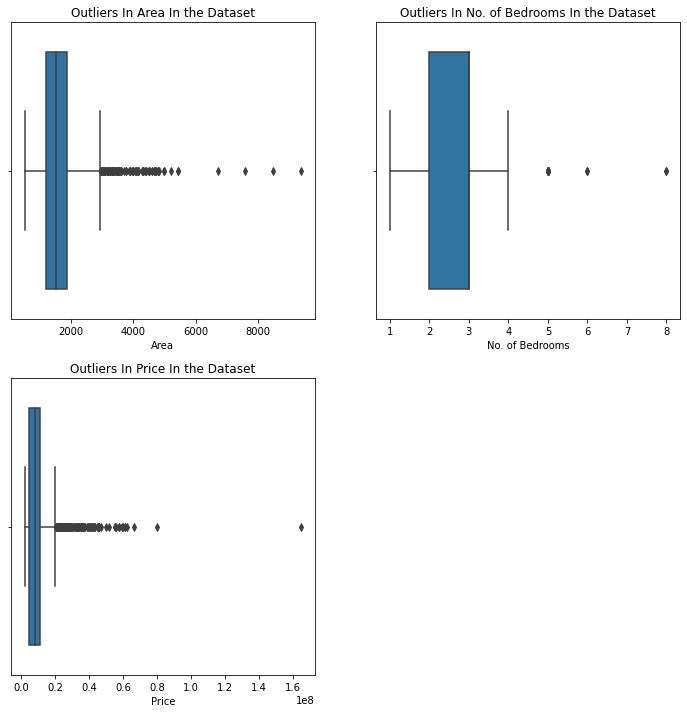

In [10]:
plt.figure(figsize=(12,12))
plt.subplot(221)
seaborn.boxplot(x=hyderabad_dataset['Area'])
plt.title('Outliers In Area In the Dataset')
plt.subplot(222)
seaborn.boxplot(x=hyderabad_dataset['No. of Bedrooms'])
plt.title('Outliers In No. of Bedrooms In the Dataset')
plt.subplot(223)
seaborn.boxplot(x=hyderabad_dataset['Price'])
plt.title('Outliers In Price In the Dataset')

In [11]:
#Quantile-based Flooring and Capping

for feature in ['No. of Bedrooms','Area','Price']:
    print('Initial Skew value: ', hyderabad_dataset[feature].skew())
    Q1 = hyderabad_dataset[feature].quantile(0.25)
    Q3 = hyderabad_dataset[feature].quantile(0.75)
    #print(Q1,Q3)
    hyderabad_dataset[feature] = np.where(hyderabad_dataset[feature] <Q1, Q1,hyderabad_dataset[feature])
    hyderabad_dataset[feature] = np.where(hyderabad_dataset[feature] >Q3, Q3,hyderabad_dataset[feature])
    print('Final Skew value: ', hyderabad_dataset[feature].skew())
    print()

Initial Skew value:  0.8918809474907056
Final Skew value:  -0.29383493607008415

Initial Skew value:  2.7559332391767244
Final Skew value:  0.11541183187061262

Initial Skew value:  4.691124278760822
Final Skew value:  0.05563069552075691



In [12]:
hyderabad_dataset.shape, hyderabad_dataset.columns

((1914, 41),
 Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
        'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
        'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
        'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
        '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
        'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
        'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
        'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
        'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'AreaRank'],
       dtype='object'))

# **Feature Transformation and Engineering**

In [13]:
#convert price units to lakhs
hyderabad_dataset['Price'] = hyderabad_dataset['Price']/100000

**Feature Importance**

(1914, 39) (1914,)


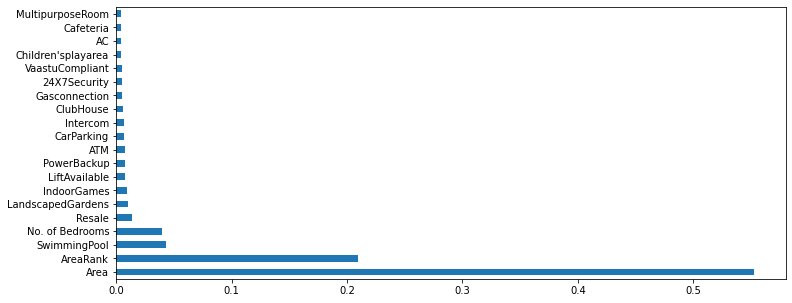

In [14]:
features = hyderabad_dataset.drop(['Price', 'Location'], axis=1)
label = hyderabad_dataset['Price']
hyderabad_dataset.drop("Price", inplace=True, axis=1)
print(features.shape, label.shape)

plt.figure(figsize=(12,5))
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(features, label)
feature_importance = pd.Series(etr.feature_importances_, index=features.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.show()


**Heatmap for understanding  correlation**

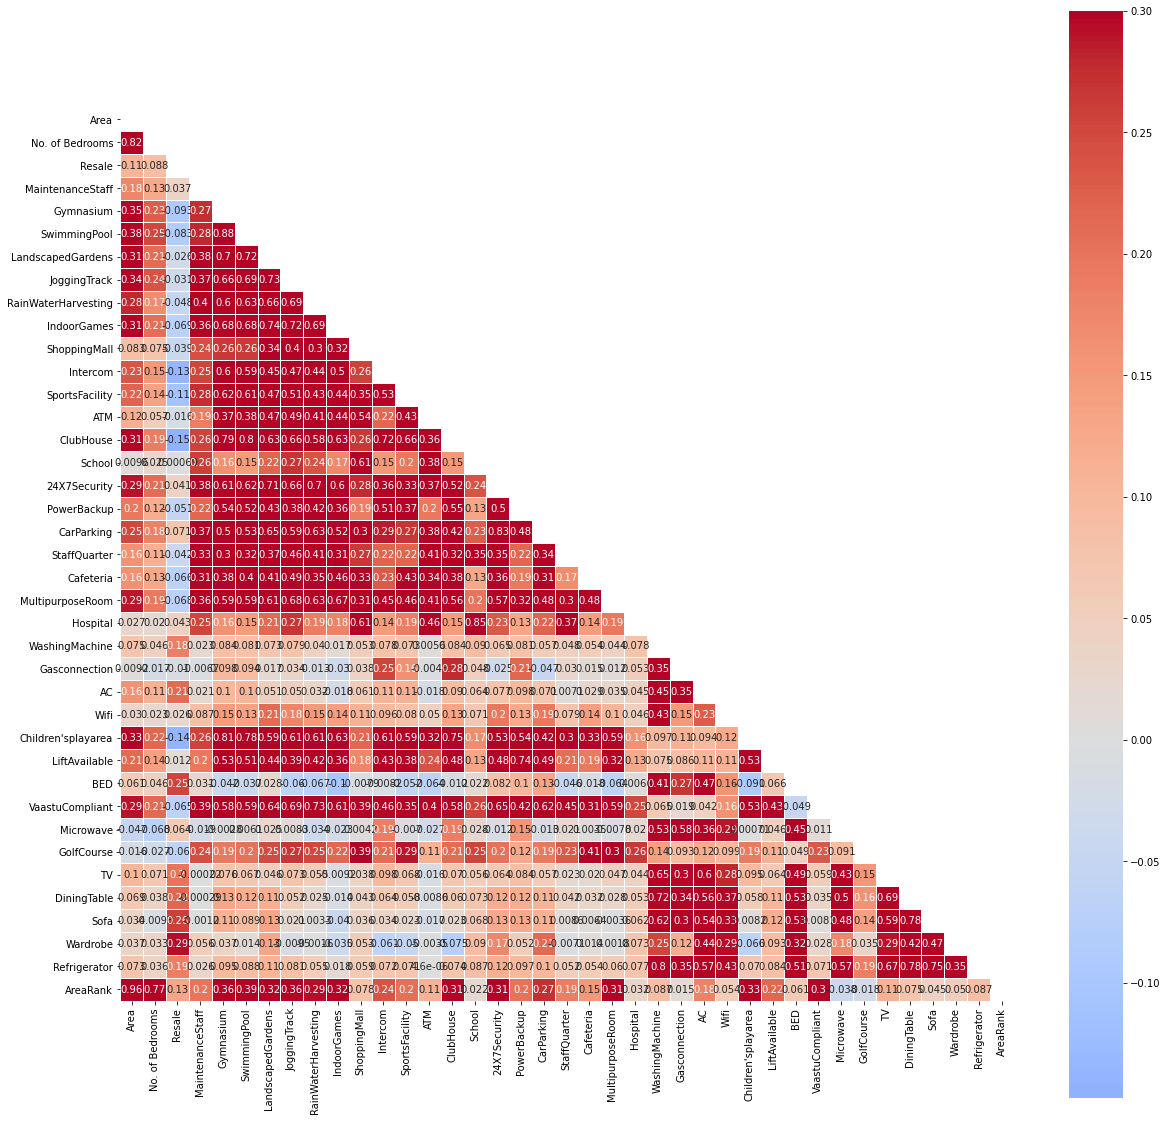

In [15]:
plt.figure(figsize=(20,20))
corr=hyderabad_dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
seaborn.heatmap(hyderabad_dataset.corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

**Correlation Checking (Visually)**

In [16]:
import networkx as nx
indices = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_matrix(cor_matrix)
G = nx.relabel_nodes(G,lambda x: indices[x])
G.edges(data=True)
print()

In [17]:
def corr_network(G, corr_direction, min_correlation):
    H = G.copy()

    for s1, s2, weight in G.edges(data=True):       
        if corr_direction == "positive":
            if weight["weight"] < 0 or weight["weight"] < min_correlation:
                H.remove_edge(s1, s2)
        else:
            if weight["weight"] >= 0 or weight["weight"] > min_correlation:
                H.remove_edge(s1, s2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    weights = tuple([(1+abs(x))**2 for x in weights])
   
    d = dict(nx.degree(H))
    nodelist=d.keys()
    node_sizes=d.values()
    
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(15,15))

    nx.draw_networkx_nodes(H,positions,node_color='#d100d1',nodelist=nodelist,
                       node_size=tuple([x**3 for x in node_sizes]),alpha=0.8)

    nx.draw_networkx_labels(H, positions, font_size=8)

    if corr_direction == "positive":
        edge_colour = plt.cm.summer 
    else:
        edge_colour = plt.cm.autumn
        
    nx.draw_networkx_edges(H, positions, edgelist=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show() 

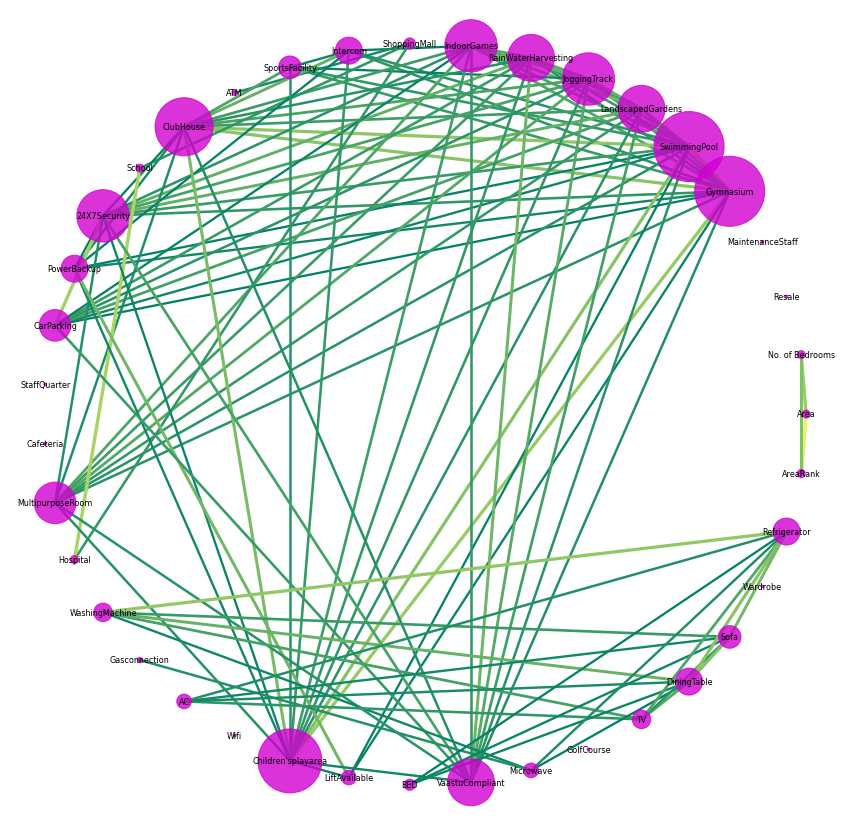

In [18]:
corr_network(G, corr_direction="positive",min_correlation = 0.5)

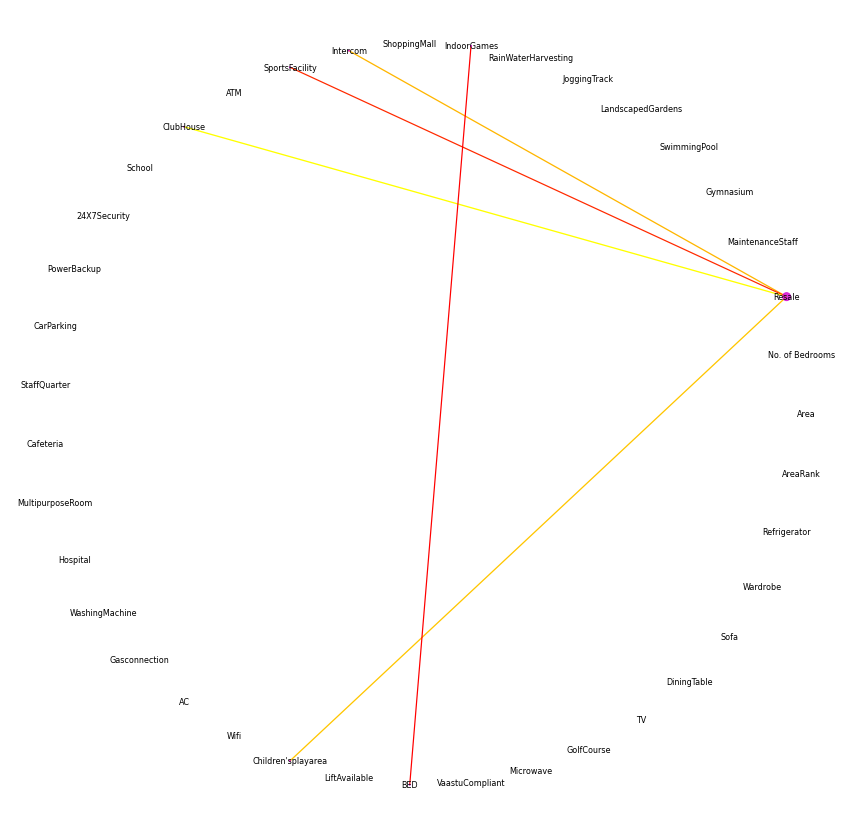

In [19]:
corr_network(G, corr_direction="negative",min_correlation = -0.1)

**Convert categorical variable into dummy/indicator variables**

In [20]:
print(list(hyderabad_dataset.columns))
hyderabad_dataset = pd.get_dummies(hyderabad_dataset)
hyderabad_dataset.shape, hyderabad_dataset.columns

['Area', 'Location', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC', 'Wifi', "Children'splayarea", 'LiftAvailable', 'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'AreaRank']


((1914, 278),
 Index(['Area', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff', 'Gymnasium',
        'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
        'RainWaterHarvesting', 'IndoorGames',
        ...
        'Location_Zamistanpur', 'Location_chandrayangutta',
        'Location_financial District', 'Location_hyderabad',
        'Location_manneguda', 'Location_muthangi', 'Location_new nallakunta',
        'Location_nizampet road', 'Location_raidurgam',
        'Location_west venkatapuram'],
       dtype='object', length=278))

**Remove Features that aren't important or redundant**

In [21]:
features = ['MaintenanceStaff', 'CarParking', 'Intercom',
            'Gymnasium', 'JoggingTrack', 'RainWaterHarvesting', 
            'ShoppingMall', 'SportsFacility', 'ATM', 'ClubHouse', 'School', 
            '24X7Security', 'StaffQuarter', 'Cafeteria', 'MultipurposeRoom', 
            'Hospital', 'WashingMachine', 'Gasconnection', 'AC', 'Wifi', "Children'splayarea", 
            'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV', 'DiningTable', 
            'Sofa', 'Wardrobe', 'Refrigerator']

selected_features = hyderabad_dataset.drop(hyderabad_dataset[features], axis=1)

# **Split the Dataset into Test and Train**

In [22]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(selected_features, label, test_size=0.3, random_state=40)
features_train.shape, features_test.shape, label_train.shape, label_test.shape, selected_features.columns

((1339, 248),
 (575, 248),
 (1339,),
 (575,),
 Index(['Area', 'No. of Bedrooms', 'Resale', 'SwimmingPool',
        'LandscapedGardens', 'IndoorGames', 'PowerBackup', 'LiftAvailable',
        'AreaRank', 'Location_ALIND Employees Colony',
        ...
        'Location_Zamistanpur', 'Location_chandrayangutta',
        'Location_financial District', 'Location_hyderabad',
        'Location_manneguda', 'Location_muthangi', 'Location_new nallakunta',
        'Location_nizampet road', 'Location_raidurgam',
        'Location_west venkatapuram'],
       dtype='object', length=248))

# **Prediction Model**

In [23]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

#DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state = 0)

#KNeighborsRegressor
KNR = KNeighborsRegressor()

#XGBRegressor
XGBR = XGBRegressor(max_depth=80,learning_rate=0.01,n_estimators=1000)

#RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 100, random_state = 0)


#Fitting the models
DTR.fit(features_train, label_train)
KNR.fit(features_train, label_train)
XGBR.fit(features_train,label_train)
RFR.fit(features_train, label_train)
print()

**R2 score and Measurements of Error**

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score




def calc_r2(l, pred_values):
    print('r2_score: ', r2_score(l, pred_values))
def calc_moe(l, pred_values):
    print('root_mean_square_error: ', mean_squared_error(l, pred_values, squared = False))
    print('mean_absolute_error: ', mean_absolute_error(l, pred_values))
    print('mean_absolute_percentage_error: ', mean_absolute_percentage_error(l, pred_values))
    print('explained_variance_score: ', explained_variance_score(l, pred_values))
    
    
models =[DTR, KNR, XGBR, RFR]
models_name = ['DTR','KNR', 'XGBR ', 'RFR']
i=0
for model in models:
    print(models_name[i])
    print()
    i+=1
    print('Training Data:')
    pred_values = model.predict(features_train)
    calc_r2(label_train, pred_values)
    calc_moe(label_train, pred_values)
    print()
    print('Testing Data:')
    pred_values = model.predict(features_test)
    calc_r2(label_test, pred_values)
    calc_moe(label_test, pred_values)
    print()
    print()

DTR

Training Data:
r2_score:  0.9946923360382506
root_mean_square_error:  1.8600881819732211
mean_absolute_error:  0.41288139283048686
mean_absolute_percentage_error:  0.00508529735121328
explained_variance_score:  0.9946923360382506

Testing Data:
r2_score:  0.7769152469317616
root_mean_square_error:  11.717486441329875
mean_absolute_error:  6.327307913043487
mean_absolute_percentage_error:  0.08288408782046773
explained_variance_score:  0.778405702572067


KNR

Training Data:
r2_score:  0.8377372486703203
root_mean_square_error:  10.28469085227034
mean_absolute_error:  6.399960395817774
mean_absolute_percentage_error:  0.08723330908180295
explained_variance_score:  0.8378134439718241

Testing Data:
r2_score:  0.747676434471629
root_mean_square_error:  12.461732414814445
mean_absolute_error:  8.18002260173913
mean_absolute_percentage_error:  0.11054854401020037
explained_variance_score:  0.7484473267475966


XGBR 

Training Data:
r2_score:  0.9946736857349842
root_mean_square_error: 

# **Hybrid Model**

In [25]:
#Create new Test and Train datasets that contain prices predicted by the models used

label_pred_xgbr_train = XGBR.predict(features_train)
#label_pred_knr_train = KNR.predict(features_train)
label_pred_rfr_train = RFR.predict(features_train)
label_pred_dtr_train = DTR.predict(features_train)


features_train_new = pd.DataFrame()
features_train_new['xgbr'] = label_pred_xgbr_train
#features_train_new['knr'] = label_pred_knr_train
features_train_new['rfr'] = label_pred_rfr_train
features_train_new['dtr'] = label_pred_dtr_train


label_pred_xgbr_test = XGBR.predict(features_test)
#label_pred_knr_test = KNR.predict(features_test)
label_pred_rfr_test = RFR.predict(features_test)
label_pred_dtr_test = DTR.predict(features_test)

features_test_new = pd.DataFrame()
features_test_new['xgbr'] = label_pred_xgbr_test
#features_test_new['knr'] = label_pred_knr_test
features_test_new['rfr'] = label_pred_rfr_test
features_test_new['dtr'] = label_pred_dtr_test

features_train_new.shape, features_test_new.shape

((1339, 3), (575, 3))

In [26]:
hybrid = XGBRegressor(max_depth=80,learning_rate=0.01,n_estimators=1000)
hybrid.fit(features_train_new,label_train)
print()

In [27]:
print('Training Data:')
pred_values = hybrid.predict(features_train_new)
calc_r2(label_train, pred_values)
calc_moe(label_train, pred_values)
print()
print()
print('Testing Data:')
pred_values = hybrid.predict(features_test_new)
calc_r2(label_test, pred_values)
calc_moe(label_test, pred_values)

Training Data:
r2_score:  0.9946923048787333
root_mean_square_error:  1.8600936419425513
mean_absolute_error:  0.41629926813970336
mean_absolute_percentage_error:  0.0051286874083716245
explained_variance_score:  0.9946923249050658


Testing Data:
r2_score:  0.8487269121397842
root_mean_square_error:  9.648956558876039
mean_absolute_error:  5.336823412043563
mean_absolute_percentage_error:  0.07284520548129751
explained_variance_score:  0.8490729962047368
